In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from seegull import load_image
from seegull import dino

2024-06-27 05:56:20.602787: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 05:56:21.572254: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Load the annotations
df = pd.read_csv("../tests/data/images.csv")

# Create a unique ID for each row/annotation
df["id"] = np.arange(len(df))

df

,image_id,image_source,image_height,image_width,object,material,brand,x1,y1,x2,y2,id
0,2105761973738690856,https://storage.googleapis.com/seegull-test-da...,900,900,Can/Tin/Cylinder,Metal,old jamaica,284.0,74.0,674.0,780.0,0
1,357721097128884392,https://storage.googleapis.com/seegull-test-da...,900,900,Box/Card/Tray/Crate,Fiber - Cardboard / Paper Packaging,björn borg,222.0,206.0,633.0,726.0,1
2,328325079742791550,https://storage.googleapis.com/seegull-test-da...,901,901,Flexibles/Bag/Wrapper/Foil/Net,Plastic - Soft,almo nature,196.0,49.0,710.0,788.0,2
3,4875697904501717195,https://storage.googleapis.com/seegull-test-da...,666,500,Battery,Hazardous Waste,unknown,263.0,255.0,376.0,305.0,3
4,4875697904501717195,https://storage.googleapis.com/seegull-test-da...,666,500,Battery,Hazardous Waste,unknown,71.0,248.0,176.0,357.0,4
5,4875697904501717195,https://storage.googleapis.com/seegull-test-da...,666,500,Battery,Hazardous Waste,unknown,166.0,270.0,265.0,347.0,5
6,4875697904501717195,https://storage.googleapis.com/seegull-test-da...,666,500,Battery,Hazardous Waste,energizer,286.0,306.0,389.0,384.0,6
7,4875697904501717195,https://storage.googleapis.com/seegull-test-da...,666,500,Battery,Hazardous Waste,unknown,113.0,299.0,185.0,427.0,7
8,4875697904501717195,https://storage.googleapis.com/seegull-test-da...,666,500,Battery,Hazardous Waste,unknown,206.0,328.0,298.0,417.0,8
9,468836346316123269,https://storage.googleapis.com/seegull-test-da...,901,901,Bottle,Plastic - Hard,smarteyes,340.0,35.0,577.0,856.0,9


# DINOv2 Embeddings

In [3]:
# Get the embeddings
dinov2 = dino.DINOv2()
df["embeddings"] = dinov2.embeddings(df=df)
df

100%|██████████| 1/1 [00:06<00:00,  6.45s/it]


,image_id,image_source,image_height,image_width,object,material,brand,x1,y1,x2,y2,id,embeddings
0,2105761973738690856,https://storage.googleapis.com/seegull-test-da...,900,900,Can/Tin/Cylinder,Metal,old jamaica,284.0,74.0,674.0,780.0,0,"[-2.7657711505889893, -0.6070233583450317, 3.0..."
1,357721097128884392,https://storage.googleapis.com/seegull-test-da...,900,900,Box/Card/Tray/Crate,Fiber - Cardboard / Paper Packaging,björn borg,222.0,206.0,633.0,726.0,1,"[-0.2816886007785797, 0.7678671479225159, -2.6..."
2,328325079742791550,https://storage.googleapis.com/seegull-test-da...,901,901,Flexibles/Bag/Wrapper/Foil/Net,Plastic - Soft,almo nature,196.0,49.0,710.0,788.0,2,"[2.787356376647949, -4.27956485748291, 1.89843..."
3,4875697904501717195,https://storage.googleapis.com/seegull-test-da...,666,500,Battery,Hazardous Waste,unknown,263.0,255.0,376.0,305.0,3,"[2.116034507751465, -0.05328032001852989, -0.4..."
4,4875697904501717195,https://storage.googleapis.com/seegull-test-da...,666,500,Battery,Hazardous Waste,unknown,71.0,248.0,176.0,357.0,4,"[0.6707794070243835, 0.9232046008110046, 0.738..."
5,4875697904501717195,https://storage.googleapis.com/seegull-test-da...,666,500,Battery,Hazardous Waste,unknown,166.0,270.0,265.0,347.0,5,"[4.105702877044678, -1.3100790977478027, 3.557..."
6,4875697904501717195,https://storage.googleapis.com/seegull-test-da...,666,500,Battery,Hazardous Waste,energizer,286.0,306.0,389.0,384.0,6,"[5.4399237632751465, -0.8412368893623352, 5.07..."
7,4875697904501717195,https://storage.googleapis.com/seegull-test-da...,666,500,Battery,Hazardous Waste,unknown,113.0,299.0,185.0,427.0,7,"[1.3370554447174072, -0.02653452195227146, 0.1..."
8,4875697904501717195,https://storage.googleapis.com/seegull-test-da...,666,500,Battery,Hazardous Waste,unknown,206.0,328.0,298.0,417.0,8,"[2.3538990020751953, -0.09903288632631302, 3.3..."
9,468836346316123269,https://storage.googleapis.com/seegull-test-da...,901,901,Bottle,Plastic - Hard,smarteyes,340.0,35.0,577.0,856.0,9,"[-0.8826137185096741, 0.3607774078845978, 1.21..."


In [4]:
# Initialize a KNNSearch object with this model and data
knn = dinov2.knn(df, n_neighbors=5)

In [5]:
# Search for a battery (The last row in our DataFrame)
# The first result is the object itself
for dist, row in knn.search(df.tail(1)["embeddings"])[0]:
    print(dist, row.object)

1.3486991523486091e-06 Battery
42.3069804905232 Battery
45.27193289895602 Battery
47.5194413377659 Battery
48.414388729549955 Battery


In [6]:
# Predict the object type by aggregating the search results
knn.predict(df.tail(1), "object", index_col="id")

,object,object_conf
20,Battery,1.0


In [7]:
# Compare the predictions for all rows vs. the ground truth.
# The results are not good because batteries are the only object that we have
# many examples of in this data.
knn.evaluate_predict(df, "object", index_col="id")[
    ["object", "object_pred", "object_conf", "object_correct"]
]

,object,object_pred,object_conf,object_correct
0,Can/Tin/Cylinder,Bottle,0.474180,False
1,Box/Card/Tray/Crate,Battery,0.484160,False
2,Flexibles/Bag/Wrapper/Foil/Net,Flexibles/Bag/Wrapper/Foil/Net,0.260491,True
3,Battery,Battery,1.000000,True
4,Battery,Battery,1.000000,True
5,Battery,Battery,1.000000,True
6,Battery,Battery,1.000000,True
7,Battery,Battery,1.000000,True
8,Battery,Battery,1.000000,True
9,Bottle,Battery,0.482012,False


# Grounding DINO Object Detection

trying to load grounding dino directly


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)


final text_encoder_type: bert-base-uncased


The `device` argument is deprecated and will be removed in v5 of Transformers.
torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
None of the inputs have requires_grad=True. Gradients will be None


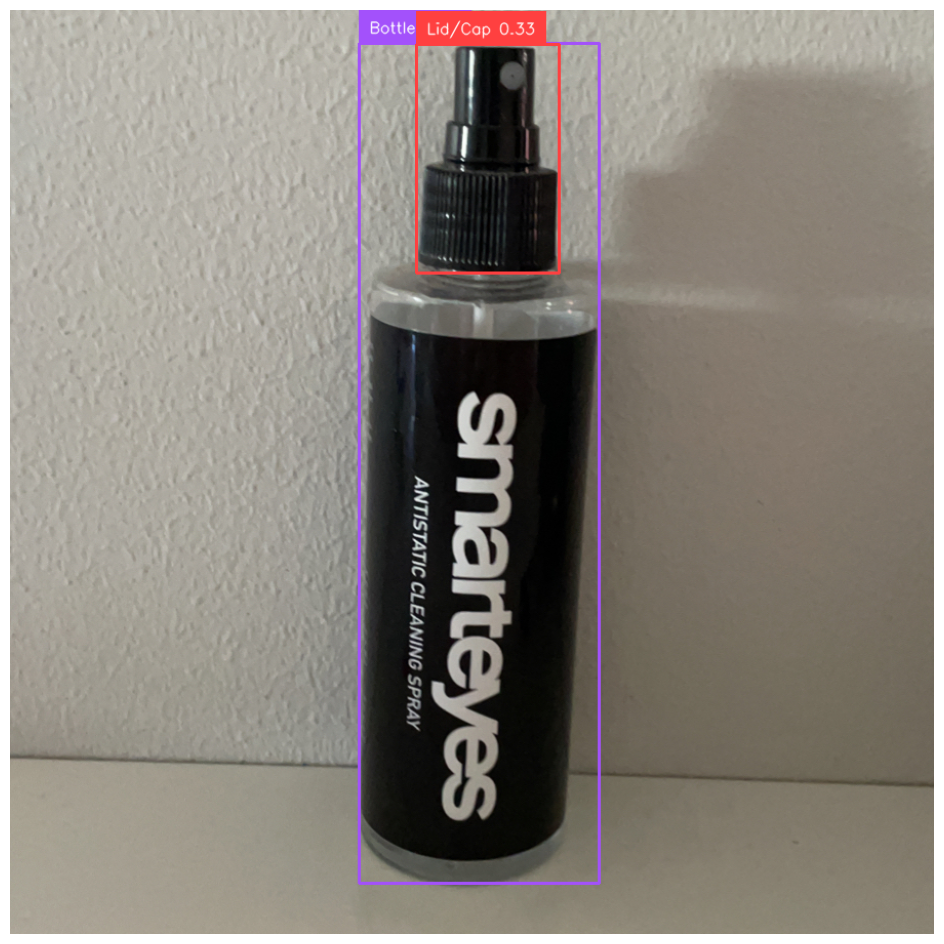

In [8]:
grounding_dino = dino.GroundingDINO(
    {
        "bottle": "Bottle",
        "cap": "Lid/Cap",
    }
)
im = load_image(df.iloc[9])
im.predict(grounding_dino, conf=0.2).annotate().display()